# NLP Project 2024/25

This notebook contains the implementation of the project for the NLP course. It is divided into the following sections:
1. Data Exploration and Processing - Task 1
2. NER Classification (GPT-Like Models included) - Task 2
3. BERT-Like Models - Task 3

Authors: Tudorita Zaharia, Alicja Krzeminska-Sciga, Tea Pula

# 1. Data Exploration and Processing

In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

pd.set_option('display.max_colwidth', None)

## 1.0 Dataset Download

https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

The Mental Health Corpus is a collection of texts related to people with anxiety, depression, and other mental health issues. The corpus consists of two columns: one containing the comments, and the other containing labels indicating whether the comments are considered poisonous or not. The corpus can be used for a variety of purposes, such as sentiment analysis, toxic language detection, and mental health language analysis. The data in the corpus may be useful for researchers, mental health professionals, and others interested in understanding the language and sentiment surrounding mental health issues.

In [3]:
import os

corpus_path = os.path.join("resources", "mental_health.csv")
corpus = pd.read_csv(corpus_path)

In [4]:
corpus.head()

,text,label
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,0
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,1
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs,0
3,im done trying feel betterthe reason im still alive know mum devastated ever killed myself ever passes im still state im going hesitate ending life shortly after im almost take meds go therapy nothing seems help enough dont want around anymore hate feeling like this wouldnt wish upon enemy brain feels like constantly like static tv wont shut overthinking do think im running options dont see living past got accepted health science degree dont even know wanna try know im smart mental illness holds back think cant anything im good enough need fucking help dont know anymore ive run options,1
4,worried year old girl subject domestic physicalmental housewithout going lot know girl know girl etc let give brief background known girl years lives uk live different country kept touch electronic means first girl schizophrenic host illnesses too dad severe anger issues abuses physically mentally makes serve food wash dishes clean house shouts beats petty things like spilling water picking toys floor threatened knife beats plates glasses punches head last time got beat around month ago one siblings gets beat up tried tell mother beating showed bruises too mother refuses believe even laughed off probably fear confronting him husband yells wife too family treat well either sister mean tell father put trouble family tends isolate her even remember birthday all family cold her often tend alienate since act normal girl often feels suicidal due this inflicted selfharm cut wrist starves believes way family accept her make worse two incidents life must tell about raped walking back home night initially tell parents sometime later police reports filed rape suffered false pregnancy girl symptoms disorder like lactating breasts happened early depressed incident summer approximately family sent couple family friends wellknown treatments advertised herbal therapy accupuncture etc however happened next terrible left alone husband wife went somewhere else guy tortured her instance made sit container filled water upto neck closed lid imagine kind stress panic would cause schizophrenic patient miscellaneous details gt gets visit psychiatrist school able hide problems psychiatrist noted girl able put front really well gt five psychiatrists past gt enjoys drawingpainting learning new languages writing poems gt depressed tends victimized mentality blames problems want report abuse due trouble family face tells stopped cutting lately problem refuses tell anyone abuse even tries defend father saying fault help her although seem extremely suicidal concern physically mental abuse girl subject everyday healthy environment anyone grow in really wish rescued clutches belligerent controlling father dysfunctional family,1


<h3> 1.1 Basic Statistics

In [5]:
corpus.describe()

,label
count,27977.000000
mean,0.494621
std,0.499980
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**REMARK**: We have 28_000 comments, where 49% are labelled as toxic comments.   
$\textit{The dataset is balanced between toxic and non-toxic comments.}$


<h3> 1.2 Number of Samples per Class 

In [6]:
counts = corpus['label'].value_counts()
counts

label
0    14139
1    13838
Name: count, dtype: int64

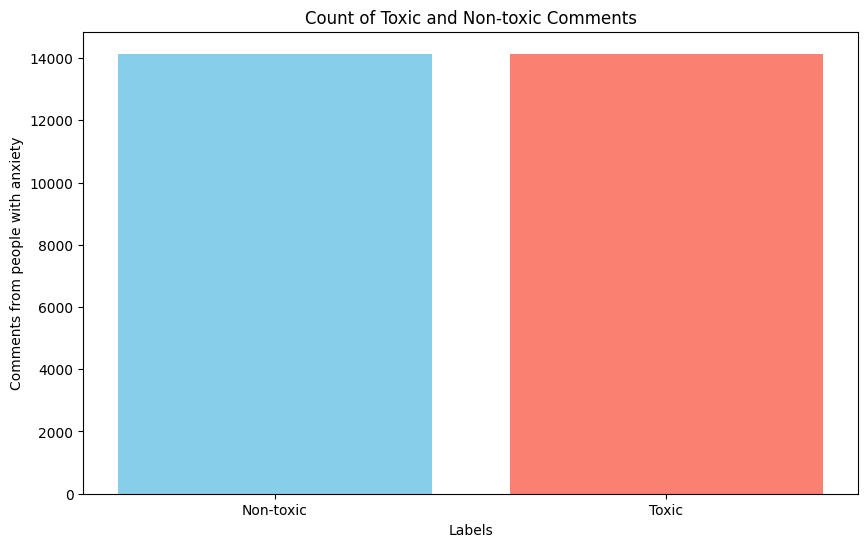

In [7]:
plt.figure(figsize=(10, 6))

plt.bar(['Non-toxic', 'Toxic'], [counts.get(0, 0), counts.get(0, 1)], color=['skyblue', 'salmon'])
plt.title('Count of Toxic and Non-toxic Comments')
plt.xlabel('Labels')
plt.ylabel('Comments from people with anxiety')

plt.show()

<h3> 1.3 Determine National Language

In [1]:
from utils.acquisition import Language_Detector
from sklearn.pipeline import Pipeline

In [30]:
# This section is commented out because it is time-consuming

# acquisition_pipeline = Pipeline(steps=[
#     ('language detector', Language_Detector())
# ])
# acquisition_pipeline.fit_transform(corpus)

In [31]:
# corpus['detected_language'].value_counts()

<h3>  1.4 Reading through 100+ samples: noteworthy style, vocabulary, spelling </h3> 

The dataset contains comments from people with mental health issues. After reading through a few samples, it can be noticed that the content looks more like a transcript of the speaking language rather than written language. 
Main observations:
- The structure of the language is messy. 
- The interpunction is missing. 
- The vocabulary is informal (e.g. "yup", "cuz", "sooooo").
- There are many typos.
- The lengths of the comments differ significantly.

<h3> 1.5 Establish a structured and flexible processing pipeline	

In [32]:
from utils.processing import Tokenizer, Normalizer, TokenFilter

text_column = "text"

text_processing_pipeline = Pipeline([
    ('tokenizer', Tokenizer(text_column="text")),
    ('normalizer', Normalizer(use_lemmatizer=True, text_column="text")),
    ('token_filter', TokenFilter(language="english", text_column="text"))
])

In [2]:
processed_texts = text_processing_pipeline.fit_transform(corpus)

In [ ]:
processed_texts.head()

<h3> 1.6 Calculate TFDs for different variants of your processing pipeline </h3>
▪ Are there differences per class?


In [ ]:
"""Splitting the corpus into two separate dataframes for each class so we can compare the TFDs"""
class_0_corpus = corpus[corpus["label"] == 0]
class_1_corpus = corpus[corpus["label"] == 1]

In [ ]:
class_0_corpus.head()

In [ ]:
"""First, the pipeline will only consist of tokenization as first stage."""
first_pipeline = Pipeline([('tokenizer', Tokenizer(text_column="text"))])

class_0_tokenized = first_pipeline.fit_transform(class_0_corpus)
class_1_tokenized = first_pipeline.fit_transform(class_1_corpus)

In [19]:
class_0_tokenized.head()

,text,label
0,"[dear, american, teens, question, dutch, person, heard, guys, get, way, easier, things, learn, age, us, sooooo, thth, graders, like, right, guys, learn, math]",0
2,"[music, recommendations, im, looking, expand, playlist, usual, genres, alt, pop, minnesota, hip, hop, steampunk, various, indie, genres, artists, people, like, cavetown, aliceband, bug, hunter, penelope, scott, various, rhymesayers, willing, explore, new, genresartists, such, anything, generic, rap, the, type, exclusively, sex, drugs, cool, rapper, is, rap, types, pretty, good, pop, popular, couple, years, ago, dunno, technical, genre, name, anyways, anyone, got, music, recommendations, favorite, artistssongs]",0
6,"[feel, like, someone, needs, hear, tonight, feeling, right, think, cant, anything, people, keep, puting, listen, this, its, your, life, everyone, else, living, it, someone, tells, unable, something, work, get, done, say, wrong, someone, says, youl, never, make, it, work, hard, make, end, one, make, it, could, make, putting, people, like, that, see, life, nobody, tell, cant, do, one, tell, live, where, love, look, end, let, climb, height, hope, someone, needed, hear, tonight, beutiful, life, good, night, sincerely, austin, zippy]",0
10,"[excercise, motivated, ngl, cant, wait, get, shape, know, gon, na, overnight, im, happy, right, now]",0
11,"[know, youd, rather, laid, big, booty, body, hella, positive, cuz, got, big, booty]",0


In [3]:
import nltk
import matplotlib.pyplot as plt

# flatten the tokens for both classes
class_0_tokens = [token for tokens_list in class_0_tokenized["text"] for token in tokens_list]
class_1_tokens = [token for tokens_list in class_1_tokenized["text"] for token in tokens_list]

# calculate term frequency distributions (TFD) 
tfd_class_0 = nltk.FreqDist(class_0_tokens)
tfd_class_1 = nltk.FreqDist(class_1_tokens)

sample_size = 30

class_0_most_frequent = tfd_class_0.most_common(sample_size)
class_1_most_frequent = tfd_class_1.most_common(sample_size)

class_0_words, class_0_freqs = zip(*class_0_most_frequent)
class_1_words, class_1_freqs = zip(*class_1_most_frequent)

# Create subplot with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the frequency distribution for class 0 (Non-toxic)
axes[0].barh(class_0_words, class_0_freqs, color='skyblue')
axes[0].set_title('Top 30 Words in Class 0 (Non-toxic)')
axes[0].invert_yaxis()

# Plot the frequency distribution for class 1 (Toxic)
axes[1].barh(class_1_words, class_1_freqs, color='salmon')
axes[1].set_title('Top 30 Words in Class 1 (Toxic)')
axes[1].invert_yaxis()  # Invert y-axis to show the most frequent words on top

plt.tight_layout()
plt.show()


The corpus was first split into two categories: toxic (label 1) and non-toxic (label 0), in order to compare their term frequency distributions (TFDs). In this initial variant, the pipeline is limited to tokenization. While tokenizing alone does not provide deep insights into the underlying text, the TFDs still reveal notable differences between the two classes. The non-toxic class features frequent words such as 'like' , 'good' , 'film' , 'time' , 'feel' , 'love' , and 'life' , which generally convey a positive tone. In contrast, the toxic class shows words like 'feel' , 'life' , 'can’t' , 'people' , 'time' , 'never' , 'don’t' , 'much' , 'friends' , and 'anymore' , reflecting a more negative or distressing context.

In [4]:
"""Now, it is time to make our pipeline a bit more sophisticated by adding the "normalized" stage, which lowercases the text and applies either lemmatization or stemming."""

second_pipeline = Pipeline([('tokenizer', Tokenizer(text_column="text")),
                            ('normalizer', Normalizer(use_lemmatizer=True, text_column="text"))])

class_0_normalized = second_pipeline.fit_transform(class_0_corpus)
class_1_normalized = second_pipeline.fit_transform(class_1_corpus)

class_0_normalized.head()

In [5]:
# flatten the tokens/words for both classes
class_0_tokens = [token for tokens_list in class_0_normalized["text"] for token in tokens_list]
class_1_tokens = [token for tokens_list in class_1_normalized["text"] for token in tokens_list]

# calculate term frequency distributions (TFD) 
tfd_class_0 = nltk.FreqDist(class_0_tokens)
tfd_class_1 = nltk.FreqDist(class_1_tokens)

sample_size = 30

class_0_most_frequent = tfd_class_0.most_common(sample_size)
class_1_most_frequent = tfd_class_1.most_common(sample_size)

class_0_words, class_0_freqs = zip(*class_0_most_frequent)
class_1_words, class_1_freqs = zip(*class_1_most_frequent)

# Create subplot with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the frequency distribution for class 0 (Non-toxic)
axes[0].barh(class_0_words, class_0_freqs, color='skyblue')
axes[0].set_title('Top 30 Words in Class 0 (Non-toxic)')
axes[0].invert_yaxis()

# Plot the frequency distribution for class 1 (Toxic)
axes[1].barh(class_1_words, class_1_freqs, color='salmon')
axes[1].set_title('Top 30 Words in Class 1 (Toxic)')
axes[1].invert_yaxis()  # Invert y-axis to show the most frequent words on top

plt.tight_layout()
plt.show()


In the second variant, the pipeline includes an additional normalization stage alongside tokenization. The purpose of this stage is to lowercase the text and apply either lemmatization or stemming. In our case, we applied lemmatization to both corpora. By converting the text to lowercase, identical words are merged, increasing word frequency and reducing redundancy since case sensitivity is no longer a factor. Similarly, lemmatization reduces words to their base form, grouping variations together. While the contextual differences between this variant and the initial one are not significant, there are still notable distinctions between the classes. In the non-toxic class, the top 30 most frequent words include 'like' , 'film' , 'movie' , 'filler' , 'people' , 'good' , 'really' , 'day' , and 'friend' , which suggest a generally positive context. Conversely, in the toxic class, frequent words such as 'feel' , 'life' , 'even' , 'can’t' , 'would' , 'one' , 'people' , 'friend' , 'go' , 'think' , 'never' , and 'don’t' , suggest a more negative or distressed tone.

In [6]:
"""Finally, the final step is to add the third stage to our pipeline which excludes tokens that are either stopwords or punctuation to see if it makes a difference in the previous TFD scores."""

second_pipeline = Pipeline([('tokenizer', Tokenizer(text_column="text")),
                            ('normalizer', Normalizer(use_lemmatizer=True, text_column="text")),
                            ('token_filter', TokenFilter(language="english", text_column="text"))])

class_0_filtered = second_pipeline.fit_transform(class_0_corpus)
class_1_filtered = second_pipeline.fit_transform(class_1_corpus)

class_0_filtered.head()

In [7]:
# flatten the tokens/words for both classes
class_0_tokens = [token for tokens_list in class_0_filtered["text"] for token in tokens_list]
class_1_tokens = [token for tokens_list in class_1_filtered["text"] for token in tokens_list]

# calculate term frequency distributions (TFD) 
tfd_class_0 = nltk.FreqDist(class_0_tokens)
tfd_class_1 = nltk.FreqDist(class_1_tokens)

sample_size = 30

class_0_most_frequent = tfd_class_0.most_common(sample_size)
class_1_most_frequent = tfd_class_1.most_common(sample_size)

class_0_words, class_0_freqs = zip(*class_0_most_frequent)
class_1_words, class_1_freqs = zip(*class_1_most_frequent)

# Create subplot with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the frequency distribution for class 0 (Non-toxic)
axes[0].barh(class_0_words, class_0_freqs, color='skyblue')
axes[0].set_title('Top 30 Words in Class 0 (Non-toxic)')
axes[0].invert_yaxis()

# Plot the frequency distribution for class 1 (Toxic)
axes[1].barh(class_1_words, class_1_freqs, color='salmon')
axes[1].set_title('Top 30 Words in Class 1 (Toxic)')
axes[1].invert_yaxis()  # Invert y-axis to show the most frequent words on top

plt.tight_layout()
plt.show()


In the final variant, the pipeline includes an additional filtering stage alongside tokenization and normalization. The goal of this stage is to exclude stopwords and punctuation, such as 'it' and 'me,' which are no longer visible in the plots, as they do not add value to the text analysis. In the non-toxic class, the top 30 most frequent words include 'like,' 'film,' 'movie,' 'people,' 'good,' 'really,' 'want,' 'day,' and 'friend,' suggesting that the text may generally have a positive context. On the other hand, in the toxic class, frequent words such as 'feel,' 'life,' 'even,' 'can’t,' 'never,' 'much,' 'help,' 'thought,' and 'anymore' suggest a more negative tone.

# 2. NER Classification

<h2> 0.* Dependencies </h2>

- **language_tool_python** : for grammar checker
- **cupy**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: for cuda with GPU in Kaggle Environment.
- **label-studio**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: tool for manual annotation of text (raw, grammatically corrected, etc.)

In [1]:
# !nvcc --version                         # only in Kaggle for CUDA VERSION
# !pip install --upgrade spacy[cuda101]   # only in Kaggle for spacy with CUDA
# python -m spacy download en_core_web_sm   
# !pip install language_tool_python 
# !pip install label-studio

<h2> 0.* Libraries </h2>

- **NER Classification**:
    - spacy
    - transformers

- **Visualization**:
    - matplotlib
    - itertools

- **Data Management**:
    - pandas
    - json
    - tqdm

- **Data Preprocessing**:
    - language_tool_python


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from transformers import BertTokenizer, BertForTokenClassification
from transformers import pipeline

import matplotlib.pyplot as plt
import language_tool_python
import pandas as pd
import itertools
from tqdm import tqdm 
import json 
import spacy
import os

if os.path.exists('/kaggle'):
    import cupy as cp         # only in Kaggle
    import torch              # only in kaggle
    spacy.require_gpu()       # only in Kaggle 

pd.set_option('display.max_colwidth', None)

c:\Users\tudor\Documents\BERN\AN 2 SEM 2\NLP\2024_NLP_Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [4]:
if os.path.exists('/kaggle'):
    corpus = pd.read_csv('/kaggle/input/spell-checked-mental-health-corpus/mental_health.csv')
else:
    corpus = pd.read_csv('resources/mental_health.csv')

<div style="display: flex; align-items: center; justify-content: center; font-family: Arial, sans-serif;">
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        SpaCy Classification
    </div>
    <div style="margin: 0 10px; font-size: 24px; font-weight: bold;">→</div>
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        Grammar Checker
    </div>
    <div style="margin: 0 10px; font-size: 24px; font-weight: bold;">→</div>
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        Evaluation
    </div>
    <div style="margin: 0 10px; font-size: 24px; font-weight: bold;">→</div>
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        GPT Evaluation
    </div>
</div>


## 1. SpaCy Classification 

Variable **nlp** for english pipeline contains:
- tok2vec
- parser
- senter
- NER
- attribute_ruler
- lemmatizer

In [5]:
# Load small Spacy model 
nlp = spacy.load("en_core_web_sm")

# apply the SpaCy NLP pipeline to identify NER entities
doc = nlp(corpus.iloc[5]['text'])

# pretty-print them with Displacy
spacy.displacy.render(doc, style="ent")

In [6]:
# create column for NER entities
corpus['entities'] = [[] for _ in range(len(corpus))]

entities_list = []

with tqdm(total=len(corpus), desc="Processing NER") as pbar:

    # Use nlp.pipe() for batch processing with parallelization
    for i, doc_chunk in enumerate(nlp.pipe(corpus['text'], batch_size=32, n_process=4)):
        
        entities = [(ent.text, ent.label_) for ent in doc_chunk.ents]
        entities_list.append(entities)
        
        pbar.update(32)

corpus['entities'] = entities_list

Processing NER: 895264it [02:35, 5768.98it/s]                          


In [7]:
corpus.head(3)

,text,label,entities
0,dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like right guys learn math,0,"[(american, NORP), (dutch, NORP), (us, GPE)]"
1,nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself,1,"[(next day, DATE)]"
2,music recommendations im looking expand playlist usual genres alt pop minnesota hip hop steampunk various indie genres artists people like cavetown aliceband bug hunter penelope scott various rhymesayers willing explore new genresartists such anything generic rap the type exclusively sex drugs cool rapper is rap types pretty good pop popular couple years ago dunno technical genre name anyways anyone got music recommendations favorite artistssongs,0,"[(minnesota, GPE)]"


<h2> 1.2. Grammar Checker </h2>

The dataset contains the following characteristics:
- lower-case words (e.g. sandia, arthur etc.)
- misspelled words (e.g. rredflag, wasntt etc.)

We use the LanguageTool NLP-based model (https://languagetool.org/?force_language=1) that grammatically checks for errors.

This model requires the local machine to have installed JAVA.

In [8]:
# create column where to put the correct text
corpus['correct_text'] = [[] for _ in range(len(corpus))]

# was trained for 1 Hour with GPU on Kaggle  
if os.path.exists('/kaggle'):

    # define the language tool for english
    tool = language_tool_python.LanguageTool('en-US')

    for i, doc in tqdm(enumerate(corpus['text']),total=len(corpus)):
        matches = tool.check(doc)
        corpus.at[i,'correct_text'] = language_tool_python.utils.correct(doc, matches)
    
    corpus.to_csv('/kaggle/working/corrected_data.csv')
else:
    # READING THE Grammatically corrected dataset 
    corpus['correct_text'] = pd.read_csv('resources/corrected_data.csv')['correct_text']

In [9]:
# apply the SpaCy NLP pipeline to identify NER entities
doc = nlp(corpus.iloc[5]['text'])

# pretty-print them with Displacy
spacy.displacy.render(doc, style="ent")
print(50* '---')
# apply the SpaCy NLP pipeline to identify NER entities
doc = nlp(corpus.iloc[5]['correct_text'])

# pretty-print them with Displacy
spacy.displacy.render(doc, style="ent")

------------------------------------------------------------------------------------------------------------------------------------------------------


In [10]:
# create column for NER entities
corpus['corrected_entities'] = [[] for _ in range(len(corpus))]

entities_list = []

with tqdm(total=len(corpus), desc="Processing NER") as pbar:

    # Use nlp.pipe() for batch processing with parallelization
    for i, doc_chunk in enumerate(nlp.pipe(corpus['correct_text'], batch_size=32, n_process=4)):
        
        entities = [(ent.text, ent.label_) for ent in doc_chunk.ents]
        entities_list.append(entities)
        
        pbar.update(32)

corpus['corrected_entities'] = entities_list

Processing NER: 895264it [02:25, 6151.85it/s]                          


<h2> 1.3. SPACY Labeling </h2>

- **PERSON**: People, including fictional.
- **NORP**: Nationalities or religious or political groups.
- **FAC**: Buildings, airports, highways, bridges, etc.
- **ORG**: Companies, agencies, institutions, etc.
- **GPE**: Countries, cities, states.
- **LOC**: Non-GPE locations, mountain ranges, bodies of water.
- **PRODUCT**: Objects, vehicles, foods, etc. (Not services.)
- **EVENT**: Named hurricanes, battles, wars, sports events, etc.
- **WORK_OF_ART**: Titles of books, songs, etc.
- **LAW**: Named documents made into laws.
- **LANGUAGE**: Any named language.
- **DATE**: Absolute or relative dates or periods.
- **TIME**: Times smaller than a day.
- **PERCENT**: Percentage, including “%”.
- **MONEY**: Monetary values, including unit.
- **QUANTITY**: Measurements, as of weight or distance.
- **ORDINAL**: “first”, “second”, etc.
- **CARDINAL**: Numerals that do not fall under another type.


In this section we take the manually annotated NER LABEL from Label Studio. They are in ```project-3.json``` file. They will be stored in a new dataframe called ground truth.  

**INPUT**
- **JSON_FILE** 
    - is exported from Label studio GUI and saved in the resources folder.

**OUTPUT**
- df 
    - dataframe with 'text' and 'annotations'columns for standard spacy NER labels.

In [11]:
# manual annotations (Label Studio)
if os.path.exists('/kaggle'):
    JSON_FILE        = '/kaggle/input/spell-checked-mental-health-corpus/project-3.json'
    JSON_FILE_38_69  = '/kaggle/input/spell-checked-mental-health-corpus/project-3-rows-38-69.json'
    JSON_FILE_70_100 = '/kaggle/input/spell-checked-mental-health-corpus/project-3-rows-70-100.json'
else:
    JSON_FILE        = 'resources/project-3.json'
    JSON_FILE_38_69  = 'resources/project-3-rows-38-69.json'
    JSON_FILE_70_100 = 'resources/project-3-rows-70-100.json'

In [12]:
from utils.metrics import read_ner_annotations

spacy_ground_truth_0_37     = read_ner_annotations(JSON_FILE)
spacy_ground_truth_38_69    = read_ner_annotations(JSON_FILE_38_69)
spacy_ground_truth_70_100   = read_ner_annotations(JSON_FILE_70_100)

# manual annotations for 100 instances in the corpus
spacy_ground_truth = pd.concat([spacy_ground_truth_0_37, spacy_ground_truth_38_69, spacy_ground_truth_70_100])

# READING CUSTOM ANNOTATTIONS FOR LABELS (SYMPTOM, TREATMENT, MEDICATION, DISEASE) that will be later used 
custom_ground_truth_0_37    = read_ner_annotations('resources/project-3-rows-01-37-custom-labels.json')
custom_ground_truth_38_69   = read_ner_annotations('resources/project-3-rows-38-69-custom-labels.json')
custom_ground_truth_70_100  = read_ner_annotations('resources/project-3-rows-70-100-custom-labels.json')

custom_ground_truth = pd.concat([custom_ground_truth_0_37,custom_ground_truth_38_69,custom_ground_truth_70_100])
print(corpus.iloc[1],'\n')
print(corpus.iloc[39],'\n')
print(corpus.iloc[70],'\n')

text                  nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
label                                                                                                                                     1
entities                                                                                                                 [(next day, DATE)]
correct_text          Nothing look forward life don't many reasons keep going feel like nothing keeps going next day makes want hang myself
corrected_entities                                                                                                       [(next day, DATE)]
Name: 1, dtype: object 

text                  giving thoughtsive wanting od since  im almost  getting worse started wasnt bad easy distract thoughts pretty infrequent cant get head things much complicated thoughts mainly bother me part wants give make stop
label                                     

In this section we pre-process the JSON file by as a dictionary the following format:

Some important observationrs are that for fine-tuning spacy, the data requires a different format compared to testing:
- **TRAIN Format:** `<START_INDEX, STOP_INDEX, LABEL>`
- **TEST Format:** `<TEXT, LABEL>`

To be important, we use the TRAIN format only when **fine-tuning**. Most of this notebook uses the **TEST Format**.

In [19]:
from utils.metrics import read_ner_with_index_annotations

gt_0_37    = read_ner_with_index_annotations('resources/project-3-rows-01-37-custom-labels.json')
gt_38_69   = read_ner_with_index_annotations('resources/project-3-rows-38-69-custom-labels.json')
gt_70_100  = read_ner_with_index_annotations('resources/project-3-rows-70-100-custom-labels.json')


custom_ground_truth_training = gt_0_37 + gt_38_69 + gt_70_100

<h2> 1.4. SpaCY Evaluation with Manual Labels </h2>

The chosen metric was based on **SET** operation. The reason for doing so is motivated by:
- counting **unique** instances. 
- removing **empty** labels that artificially inflate precision/recall/f1.
- the first 100 instances from corpus are manually annotated.
$$
\hat{y} - y = \textit{false positive} \\
$$
$$
y - \hat{y} = \textit{false positive} \\
$$
$$
\hat{y} \cap y = \textit{false positive} \\
$$

In [62]:
# scripts for pre-processing the JSON files or computing custom SET metrics
from utils.metrics import count_ner_labels, compute_ner_metrics, read_ner_annotations, convert_string_to_list

<h3> 1.4.1 SpaCY Evaluation for Raw Text</h3>

- **ground_truth** = corpus manually labelled 
- **predictions** = raw text from corpus

In [13]:
# the number of labels for the raw text with NER SPACY
values = count_ner_labels(corpus,'entities')

[DATE       ] : 23084
[CARDINAL   ] : 10411
[PERSON     ] : 9843
[TIME       ] : 4493
[ORDINAL    ] : 4481
[NORP       ] : 3137
[ORG        ] : 3087
[GPE        ] : 2829
[LANGUAGE   ] : 278
[LOC        ] : 214
[QUANTITY   ] : 144
[PRODUCT    ] : 117
[MONEY      ] : 116
[FAC        ] : 72
[EVENT      ] : 32
[LAW        ] : 10
[WORK_OF_ART] : 9
[PERCENT    ] : 7


In [14]:
# the PRECISION, F1, RECALL for the raw text with SPACY NER CLASSIFIER

# eval_length = 100 
EVAL_LENGTH = len(spacy_ground_truth['annotations'])

predictions  = corpus['entities'][:EVAL_LENGTH]
ground_truth = spacy_ground_truth['annotations']

values = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.48
Recall			: 0.16
F1 Score		: 0.24

False Negatives: 280

False Positives: 56


<h3> 1.4.2 SpaCY Evaluation for Corrected Text</h3>

In [15]:
# the number of labels for the grammatically corrected text with NER SPACY
values = count_ner_labels(corpus,'corrected_entities')

[DATE       ] : 23609
[PERSON     ] : 14580
[ORG        ] : 12614
[CARDINAL   ] : 10339
[GPE        ] : 5163
[TIME       ] : 4839
[ORDINAL    ] : 4461
[NORP       ] : 3837
[PRODUCT    ] : 1003
[LANGUAGE   ] : 456
[LOC        ] : 435
[FAC        ] : 185
[WORK_OF_ART] : 161
[EVENT      ] : 147
[QUANTITY   ] : 130
[MONEY      ] : 112
[LAW        ] : 12
[PERCENT    ] : 11


In [16]:
# takes a prediction subset of EVAL_LENGTH
# EVAL_LENGTH is the no. of manually annotated labels

predictions     = corpus['corrected_entities'][:EVAL_LENGTH]
ground_truth    = spacy_ground_truth['annotations']

# computes SET operations on pandas Dataframe. 
values          = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.44
Recall			: 0.20
F1 Score		: 0.27

False Negatives: 266

False Positives: 84


<h2> 1.5 SPACY Evaluation with GPT Labels</h2>

We introduce a script that generates the same output as NER Spacy Classifier:
- the script identifies all 18 NER standard labels
- it returns a list of tuples with (word, NER LABEL)


In [17]:
from openai import OpenAI
from tqdm import tqdm 

# we create a new column for the SPACY entities that will be predicted with GPT 
corpus['gpt_entities'] = [[] for _ in range(len(corpus))]

if os.path.exists('utils/open_ai_key.py') and hasattr('utils/open_ai_key.py', 'KEY'):

    from utils.open_ai_key import KEY 

    client = OpenAI(api_key = KEY)

    with open("resources/gpt_annotation_mental_health.csv", "a") as f:
        for i, doc in tqdm(enumerate(corpus['correct_text'].head(100)), total=100):
            completion = client.chat.completions.create(
                model="gpt-4o",
                messages = [
                    {"role": "system", "content": "You are a helpful assistant."},
                    {
                    "role": "user",
                    "content": f"Please annotate the text using the standard NER labels from spaCy with 18 NER labels (PERSON, NORP, FAC, ORG, GPE, LOC, PRODUCT, EVENT, WORK_OF_ART, LAW, LANGUAGE, DATE, TIME,PERCENT, MONEY, QUANTITY, ORDINAL, CARDINAL). Your output is a list of tuples separated with comma. One tuple represents (<sequence in text>, <NER SPACY LABEL>). You must be able to explain your decision if I ask why you choose a NER spacy for the given text.Do not add any indentation or new lines, if there are not NER labels the output is an empty list. Please output only the list of tuples and no other information. Apply the previous instructions for this text {doc}"
                    }
                ]
            )
            corpus.at[i, 'gpt_entities'] = completion.choices[0].message.content  

    corpus.to_csv('resources/gpt_annotation_mental_health.csv')
    # this else clause was added because we trained on KAGGLE with GPU environment
    # if we are on CPU, local computer, then we read the .CSV file that was generated during training 
else:
    if os.path.exists('/kaggle'):
        corpus = pd.read_csv('/kaggle/input/spell-checked-mental-health-corpus/gpt_annotation_mental_health.csv')
    else: 
        corpus['gpt_entities'] = pd.read_csv('resources/gpt_annotation_mental_health.csv')['gpt_entities']
        corpus['gpt_entities'] = corpus['gpt_entities'].apply(convert_string_to_list)



In [18]:
# we compute the performance of predictions producted by GPT with the ground truth as raw text annotations 
predictions     = corpus['gpt_entities'][:EVAL_LENGTH]
ground_truth    = spacy_ground_truth['annotations']

values          = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.29
Recall			: 0.21
F1 Score		: 0.24

False Negatives: 262

False Positives: 174


In [19]:
# we compute the performance of predictions producted by GPT with the ground truth as corrected text annotations 
predictions     = corpus['gpt_entities'][:EVAL_LENGTH]
ground_truth    = corpus['corrected_entities']

values          = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.20
Recall			: 0.00
F1 Score		: 0.01

False Negatives: 18427

False Positives: 194


In [20]:
# we investigate how similar are the predictions producted by GPT with the predictions produced by SPACY 
predictions     = corpus['gpt_entities'][:EVAL_LENGTH]
ground_truth    = corpus['entities']

values          = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.31
Recall			: 0.01
F1 Score		: 0.01

False Negatives: 14598

False Positives: 169


<div style="display: flex; align-items: center; justify-content: center; font-family: Arial, sans-serif;">
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        Custom Labels (TAG)
    </div>
    <div style="margin: 0 10px; font-size: 24px; font-weight: bold;">→</div>
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        Emtpy Spacy NER Classifier
    </div>
    <div style="margin: 0 10px; font-size: 24px; font-weight: bold;">→</div>
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        GPT Evaluation
    </div>
</div>


## 2. CUSTOM Labels 

In this section we create the custom labels:
- **DISEASE**
- **SYMPTOM**
- **TREATMENT**
- **MEDICATION**

In the file ```custom_tags.py``` we have some manual annotation for specific mental health diseases (e.g. schizophrenia) and other terms. We add them to our blank SPACY NER classifier.

In [21]:
# library with rule-based LABELS that will be added manually 
from utils.custom_tags import TAGS

# blank SPacy NER classifier for the english language
nlp = spacy.blank("en")

# NER classifier 
ruler = nlp.add_pipe("entity_ruler")

# adding the custom NER labels
ruler.add_patterns(TAGS)

<h2> 2.2 Spacy Classifier</h2>

<h3> 2.2.1 Blank Spacy Classifier </h3>

In the first instance, we train with a blank classifier, as a baseline.

In [22]:
# create column for NER entities
corpus['custom_entities'] = [[] for _ in range(len(corpus))]

# classify each text row ---> put results in 'entities'
for i, doc in tqdm(enumerate(nlp.pipe(corpus['correct_text'])), total=len(corpus)):
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    corpus.at[i, 'custom_entities'] = entities  
# corpus.to_csv('resources/custom_annotations_mental_health.csv')

  0%|          | 0/27977 [00:00<?, ?it/s]

100%|██████████| 27977/27977 [00:09<00:00, 3088.15it/s]


In [23]:
values = count_ner_labels(corpus,'custom_entities')

[SYMPTOM   ] : 10322
[DISEASE   ] : 3942
[TREATMENT ] : 2146
[MEDICATION] : 377


In [24]:
EVAL_LENGTH         = 98

predictions     = corpus['custom_entities'][:EVAL_LENGTH]
ground_truth    = custom_ground_truth['annotations']

values = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.70
Recall			: 0.11
F1 Score		: 0.19

False Negatives: 244

False Positives: 13


<h3> 2.2.2 Spacy Fine-Tuning </h3>
In this section we explore how we can fine-tune Spacy:

1. We load the spacy blank model for English.
2. We fine-tune the model using our TRAIN_DATA. 
3. We test the performance on the TEST_DATA.

Some important observationrs are that for fine-tuning spacy, the data requires a different format compared to testing:
- **TRAIN Format:** `<START_INDEX, STOP_INDEX, LABEL>`
- **TEST Format:** `<TEXT, LABEL>`


In [92]:
# during fine-tuning we peform a SPLIT operation to obtain TRAIN and TEST DATA
from sklearn.model_selection import train_test_split


EVAL_LENGTH          = 98
DATA                 = custom_ground_truth_training
TRAIN_DATA,TEST_DATA = train_test_split(DATA,test_size=0.2,shuffle=True,random_state=42)

In [93]:
# we will train spacy for 10 epochs 
EPOCHS = 10

In [ ]:
from spacy.training import Example 

nlp = spacy.blank("en")

if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
    
# we add manually the custom LABELS 
ner.add_label("MEDICATION")
ner.add_label("TREATMENT")
ner.add_label("SYMPTOM")
ner.add_label("DISEASE")

# we take a list with all other pipes beside NER, those will be excluded from the OPTIMIZATION
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]


In [94]:
# EXCLUDE other pipes from the optimization 
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()

    for iter in range(EPOCHS):
        losses = {}
        for values in TRAIN_DATA:
            
            text = values[0]
            annotation = values[1]
            
            doc = nlp.make_doc(text)

            example = Example.from_dict(doc, annotation)
    
            nlp.update(
                        [example],
                        drop=0.2,
                        sgd=optimizer,
                        losses=losses
            )
        print(f"Losses at iteration {iter}: {losses['ner']:.4f}")

c:\Users\tudor\Documents\BERN\AN 2 SEM 2\NLP\2024_NLP_Project\.venv\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Insanitygirlfriend broke me put a lot feelings ont..." with entities "[(504, 513, 'SYMPTOM'), (226, 231, 'SYMPTOM'), (41...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\tudor\Documents\BERN\AN 2 SEM 2\NLP\2024_NLP_Project\.venv\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "cant go oni wanna kill ive gone shit cant bare lif..." with entities "[(182, 197, 'SYMPTOM'), (112, 135, 'SYMPTOM'), (10...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
c:\Users\tudor\Documents\BER

Losses at iteration 0: 1094.1398
Losses at iteration 1: 531.2789
Losses at iteration 2: 873.2868
Losses at iteration 3: 343.9368
Losses at iteration 4: 302.0504
Losses at iteration 5: 319.3789
Losses at iteration 6: 256.6870
Losses at iteration 7: 232.8355
Losses at iteration 8: 203.8905
Losses at iteration 9: 189.1395


In [95]:
# create a <text,LABEL> format for testing 
texts                 = [item[0] for item in TEST_DATA]
ground_truth_entities = []

for text, annotation in TEST_DATA:
    # Convert entities from (start, end, label) to (text, label)
    entity_texts = [(text[start:end], label) for start, end, label in annotation['entities']]
    ground_truth_entities.append(entity_texts)

# create column for NER entities
corpus['test_entities'] = [[] for _ in range(len(corpus))]

# classify each text row ---> put results in 'entities'
for i, doc in tqdm(enumerate(nlp.pipe(texts)), total=len(texts)):
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    corpus.at[i, 'test_entities'] = entities  

100%|██████████| 20/20 [00:00<00:00, 138.74it/s]


In [96]:
values = count_ner_labels(corpus,'test_entities')

[SYMPTOM  ] : 16
[TREATMENT] : 7
[DISEASE  ] : 3


In [97]:
from utils.metrics import compute_ner_metrics

predictions     = corpus['test_entities']
ground_truth    = ground_truth_entities

values = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.50
Recall			: 0.08
F1 Score		: 0.13

False Negatives: 86

False Positives: 7


<h2> 2.3 Evaluation with GPT </h2>

We try to manually annotate with custom labels using the GPT.  

Previously, we used GPT to obtain the SPACY labels `(ORG,NORP, etc.)`.  

In this section, we explore how GPT can predict custom labels `(SYMPTOM, TREATMENT, MEDICATION, DISEASE)`.


In [43]:
from openai import OpenAI
from tqdm import tqdm 

corpus['custom_gpt_entities'] = [[] for _ in range(len(corpus))]

if os.path.exists('utils/open_ai_key.py') and hasattr('utils/open_ai_key.py', 'KEY'):

    from utils.open_ai_key import KEY 

    client = OpenAI(api_key = KEY)

    with open("resources/gpt_annotation_mental_health.csv", "a") as f:
        for i, doc in tqdm(enumerate(corpus['text'].head(100)), total=100):
            completion = client.chat.completions.create(
                model="gpt-4",
                messages = [
                    {"role": "system", "content": "You are a helpful assistant."},
                    {
                    "role": "user",
                    "content": f"Please annotate the text using the custom NER Labels for DISEASE (e.g. depression), TREATMENT (e.g. therapy), SYMPTOM (e.g. anxious), MEDICATION (e.g.xanax). Your output must be a list of tuples in the exact format: [('word', 'LABEL'), ('word', 'LABEL')]. Do not include any special characters like backslashes, quotes, or escape characters in the output. Each tuple should only contain the exact text and its label, separated by a comma and enclosed in regular parentheses. If there are no NER labels, output an empty list []. Please output only the list of tuples and no other information. Apply the previous instructions for this text: {doc}"
                    }
                ]
            )
            corpus.at[i, 'custom_gpt_entities'] = completion.choices[0].message.content  
    
    corpus.to_csv('resources/gpt_custom_annotations_mental_health.csv')
else:
    if os.path.exists('/kaggle'):
        corpus = pd.read_csv('/kaggle/input/spell-checked-mental-health-corpus/gpt_annotation_mental_health.csv')
    else: 
        corpus['custom_gpt_entities'] = pd.read_csv('resources/gpt_custom_annotations_mental_health.csv')['custom_gpt_entities']
        corpus['custom_gpt_entities'] = corpus['custom_gpt_entities'].apply(convert_string_to_list)


In [44]:
values = count_ner_labels(corpus,'custom_gpt_entities')

[SYMPTOM   ] : 164
[DISEASE   ] : 84
[TREATMENT ] : 51
[MEDICATION] : 13


In [63]:
EVAL_LENGTH    = 100
predictions    = corpus['custom_gpt_entities'][:EVAL_LENGTH]
ground_truth   = custom_ground_truth['annotations']

gpt_values = compute_ner_metrics(ground_truth, predictions)

Precision		: 0.28
Recall			: 0.22
F1 Score		: 0.24

False Negatives: 214

False Positives: 158


<div style="display: flex; align-items: center; justify-content: center; font-family: Arial, sans-serif;">
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        BERT Classifier
    </div>
    <div style="margin: 0 10px; font-size: 24px; font-weight: bold;">→</div>
    <div style="border: 2px solid black; padding: 10px; margin: 5px; text-align: center;">
        GPT Evaluation
    </div>
</div>


## 3. BERT Classification

In this section we experiment with LLM models such as BERT. 
- SPACY is a rule-based tokenization based on regular expression, BERT uses an algorithm called WORDPiece that splits words into subwords.
- SPACY has over 17 labels, BERT has only 4 labels (ORG, PERS, LOC, MISC) that are further divided into subword labels for beginning, middle and end of word.
- BERT is specifically designed for transformer-based models.
- BERT uses a pretrained vocabulary.

In [33]:
# Define batch size
batch_size = 32

# Prepare the results column
corpus['transformer_entities'] = None

if os.path.exists('/kaggle'):

    # defining the BERT model
    model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
    tokenizer = BertTokenizer.from_pretrained(model_name)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BertForTokenClassification.from_pretrained(model_name).to(device)

    ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

    # training the BERT NER classifier
    for start in tqdm(range(0, len(corpus), batch_size)):
        end = min(start + batch_size, len(corpus))
        batch_texts = corpus['text'].iloc[start:end].tolist()
        entities = ner_pipeline(batch_texts)

        transformed_entities = list(map(lambda entity: list(map(lambda ent: (ent['word'], ent['entity']), entity)), entities))

        # Update the DataFrame with transformed entities
        for i in range(len(transformed_entities)):
            corpus.at[start + i, 'transformer_entities'] = transformed_entities[i]

    corpus.to_csv('/kaggle/working/corrected_data_transformer_entities.csv', index=False)
else:
    corpus['transformer_entities'] = pd.read_csv('resources/corrected_data_transformer_entities.csv')['transformer_entities']
    corpus['transformer_entities'] = corpus['transformer_entities'].apply(convert_string_to_list)


<h2> 3.2 Evaluation with GPT </h2>

- **O**: Outside of a named entity.
- **B-PER**: Beginning of a person's name right after another entity.
- **I-PER**: Person's name continuation.
- **B-ORG**: Beginning of an organization right after another entity.
- **I-ORG**: Organization name continuation.
- **B-LOC**: Beginning of a location right after another entity.
- **I-LOC**: Location name continuation.
- **B-MISC**: Beginning of a miscellaneous entity right after another entity.
- **I-MISC**: Miscellaneous entity continuation.

### Explanation:
- **O** indicates that the token is not part of any named entity.
- **B-** (Beginning) labels indicate the start of a named entity.
- **I-** (Inside) labels are used for tokens that continue the same named entity.

We use GPT to automatically annotate the BERT labels.

In [34]:
from openai import OpenAI
from tqdm import tqdm 


corpus['gpt_transformer_entities'] = [[] for _ in range(len(corpus))]

if os.path.exists('utils/open_ai_key.py') and hasattr('utils/open_ai_key.py', 'KEY'):

    from utils.open_ai_key import KEY 

    client = OpenAI(api_key = KEY)    
    
    with open("resources/gpt_annotation_mental_health.csv", "a") as f:
        for i, doc in tqdm(enumerate(corpus['text'].head(100)), total=100):
            completion = client.chat.completions.create(
                model="gpt-4",
                messages = [
                    {"role": "system", "content": "You are a helpful assistant."},
                    {
                    "role": "user",
                    "content": f"Please annotate the text using only these BERT NER labels: B-PER (start of person), I-PER (continuation of person), B-ORG (start of organization), I-ORG (continuation of organization), B-LOC (start of location), I-LOC (continuation of location), B-MISC (start of miscellaneous), I-MISC (continuation of miscellaneous). Your output must be a list of tuples in the exact format: [('word', 'LABEL')]. For words split into subwords, label the first part with 'B-' and the subwords (starting with '##') with 'I-'. Example: [('Micro', 'B-ORG'), ('##soft', 'I-ORG'), ('John', 'B-PER'), ('##athan', 'I-PER')]. No special characters, only the list of tuples. If no entities found, output empty list []. Apply to this text: {doc}"                }
                ]        
                )
            corpus.at[i, 'gpt_transformer_entities'] = completion.choices[0].message.content  

    corpus.to_csv('resources/gpt_transformer_annotations_mental_health.csv')
else:
    if os.path.exists('/kaggle'):
        corpus['gpt_transformer_entities'] = pd.read_csv('kaggle/input/gpt_transformer_annotations_mental_health.csv')['gpt_transformer_entities']
    else:
        corpus['gpt_transformer_entities'] = pd.read_csv('resources/gpt_transformer_annotations_mental_health.csv')['gpt_transformer_entities']
        corpus['gpt_transformer_entities'] = corpus['gpt_transformer_entities'].apply(convert_string_to_list)


In [35]:
values = count_ner_labels(corpus,'gpt_transformer_entities')

[B-MISC] : 50
[B-PER ] : 36
[I-PER ] : 21
[B-ORG ] : 15
[I-MISC] : 12
[I-ORG ] : 9
[B-LOC ] : 5


In [36]:
values = count_ner_labels(corpus,'transformer_entities')

[I-PER ] : 21880
[I-ORG ] : 12933
[I-MISC] : 11771
[I-LOC ] : 5153
[B-PER ] : 144
[B-LOC ] : 10


In [ ]:
# the PRECISION, F1, RECALL for the raw text with SPACY NER CLASSIFIER
EVAL_LENGTH         = 100
eval_corpus         = corpus['transformer_entities'][:EVAL_LENGTH]
ground_truth_corpus = corpus['gpt_transformer_entities'][:EVAL_LENGTH]

values = compute_ner_metrics(ground_truth_corpus, eval_corpus)

Precision		: 0.00
Recall			: 0.00
F1 Score		: 0.00

False Negatives: 132

False Positives: 85


<h2> 5. Describe NER Type Information</h2>

We can observe about NER information the following:
- Spacy is very good for detecting numeric instances (DATE, TIME, ORDINAL, CARDINAL)
- It is very bad for names that are less known (organization, person etc.)
- the Corrected text improves the overall results shown in F1-score. 

The NER labels are very bad on identifying medical terminology (diseases, symptoms, treatment). 
In order to evaluate the actual potential of NER classifiers, we needed to add these custom classes with some patterns. 

However, it is very difficult to evaluate due to manpower. It is labor intensive to annotate manually. The GPT annotations are not accurate enough as they tend to misinterpret the true label.

SpaCy NER:
- **anxious** → `SYMPTOM`
- **depressed** → `SYMPTOM`

GPT NER:
- **anxious** → `DISEASE`
- **depressed** → `DISEASE`
- **future** → `TRIGGER`

| Model Type | Labels | Input | Ground Truth | Precision | Recall | F1 Score |
|------------|---------|-------|--------------|-----------|---------|-----------|
| SpaCy | Standard NER SPACY | Raw | Label Studio | 0.48 | 0.16 | 0.24 |
| SpaCy | Standard NER SPACY | Corrected | Label Studio | 0.44 | 0.20 | 0.27 |
| GPT | Standard NER SPACY | Raw | Label Studio | 0.29 | 0.21 | 0.24 |
| GPT | Standard NER SPACY | Corrected | Spacy(Corrected) | 0.20 | 0.00 | 0.01 |
| GPT | Standard NER SPACY | Raw | Spacy (raw) | 0.31 | 0.01 | 0.01 |
| SpaCy | Custom Mental Health NER | Raw | Label Studio | 0.70 | 0.11 | 0.19 |
| SpaCy | Custom Mental Health NER | TRAIN_DATA | Label Studio | 0.50 | 0.08 | 0.13 |
| GPT | Custom Mental Health NER | Raw | Label Studio | 0.28 | 0.22 | 0.24 |
| BERT  | Standard BERT | Raw | GPT | 0.00 | 0.00 | 0.00 |

In this section we generate custom Venn Diagrams:
- it takes the `true positive`, `false positive`, and `false negatives` produced by the function `compute_ner_metrics`. 

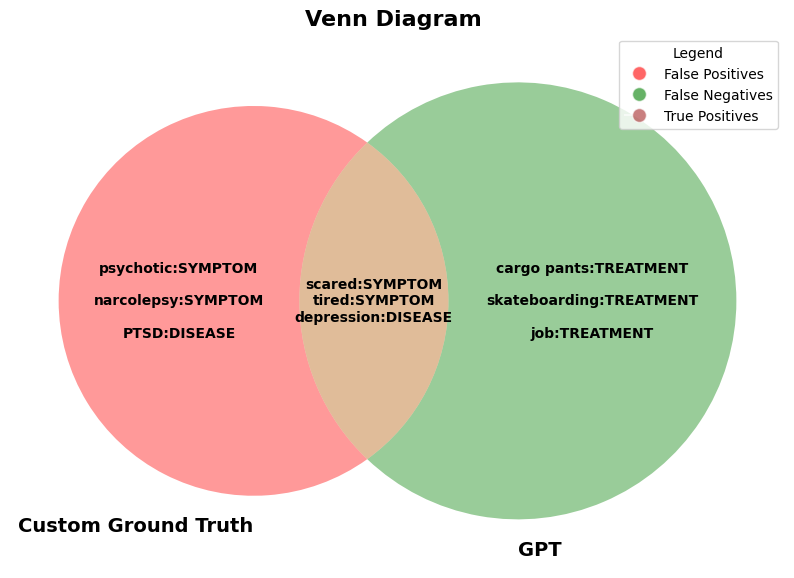

In [109]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib import font_manager

false_negatives = gpt_values['false_negatives']
false_positives = gpt_values['false_positives']
true_positives  = gpt_values['true_positives']
  
custom_gpt_entities_list = corpus['custom_gpt_entities'][:EVAL_LENGTH].explode().dropna().tolist()

custom_false_negatives = list(filter(lambda x: x not in  false_negatives, custom_gpt_entities_list))
custom_false_positives = list(filter(lambda x: x not in  false_positives, custom_gpt_entities_list))

plt.figure(figsize=(10, 8))  # Adjust size as needed

# Create the Venn diagram
venn = venn2(
        subsets    = (len(false_positives),len(false_negatives), len(true_positives)),
        set_labels = ('Custom Ground Truth', 'GPT ', ''))

# Get the 3 most common words from each list
top_3_true_positives = [f'{word[0]}:{word[1]}' for word, count in Counter(custom_false_negatives).most_common(3)]
top_3_false_positives = ['cargo pants:TREATMENT','', 'skateboarding:TREATMENT','', 'job:TREATMENT']
top_3_false_negatives = ['psychotic:SYMPTOM','', 'narcolepsy:SYMPTOM','','PTSD:DISEASE']

# Set the text labels with the top 3 most common words
venn.get_label_by_id('01').set_text("\n".join(top_3_false_positives))  # GPT (False Positives)
venn.get_label_by_id('10').set_text("\n".join(top_3_false_negatives))  # Ground Truth (False Negatives)
venn.get_label_by_id('11').set_text("\n".join(top_3_true_positives))  # Intersection (True Positives)

font_properties = font_manager.FontProperties(size=10, weight='bold')
venn.get_label_by_id('10').set_fontproperties(font_properties)  # Ground Truth label
venn.get_label_by_id('01').set_fontproperties(font_properties)  # GPT label
venn.get_label_by_id('11').set_fontproperties(font_properties)  # GPT label

for label in venn.set_labels:
    if label:  # Check if label exists
        label.set_fontweight('bold')
        label.set_fontsize(14)  # Optional: Adjust size of the set labels

legend_labels = [
    ('False Positives', 'red'),
    ('False Negatives', 'green'),
    ('True Positives', 'brown')
]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, alpha=0.6) for _, color in legend_labels]
plt.legend(legend_patches, [label for label, _ in legend_labels], loc='upper right', title='Legend', fontsize=10)


plt.title("Venn Diagram ",fontdict={'fontsize':16, 'fontweight': 'bold'})
plt.show()


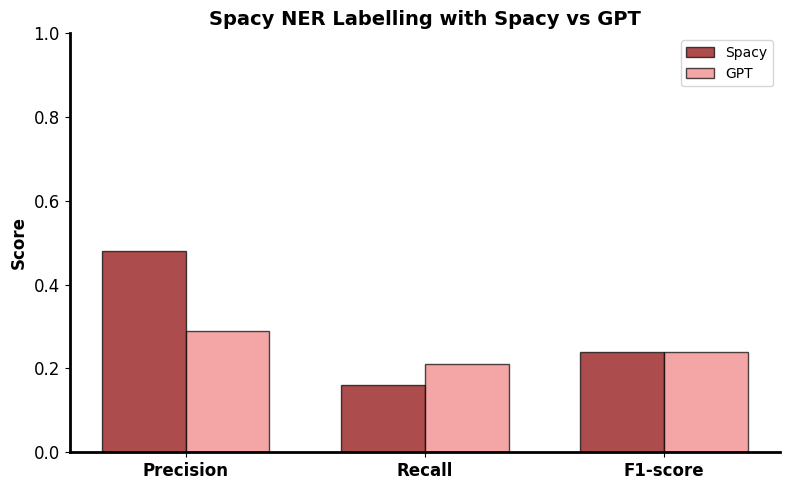

In [56]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'F1-score']

spacy_results = [0.48, 0.16, 0.24]
gpt_results   = [0.29, 0.21, 0.24]

# Plotting the bar chart
x = np.arange(len(metrics))  # The label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# BERTScore and QuantModel combined bar chart
bars_spacy = ax.bar(x - width/2, spacy_results, width,  capsize=5, color='darkred', alpha=0.7, label='Spacy')
bars_gpt   = ax.bar(x + width/2, gpt_results, width, capsize=5, color='lightcoral', alpha=0.7, label='GPT')

ax.set_title('Spacy NER Labelling with Spacy vs GPT',fontweight='bold',fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics,fontdict={'fontsize':12, 'fontweight': 'bold'})
ax.set_ylabel('Score',fontdict={'fontsize':12, 'fontweight': 'bold'})
ax.set_ylim(0, 1)


# Set tick params
ax.yaxis.set_tick_params(labelsize=12)

# Set the spine properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

for bar in bars_spacy + bars_gpt:
    bar.set_edgecolor('black') 

ax.legend()

plt.tight_layout()
plt.show()

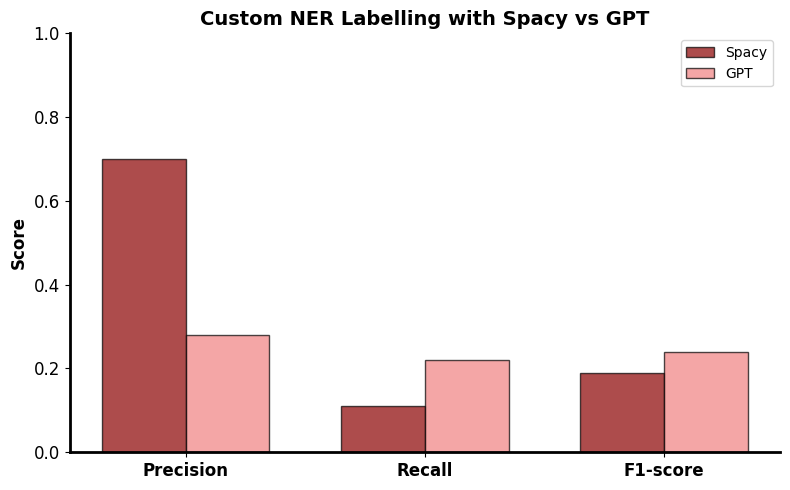

## 6. How NER prediction can help in other NLP use cases?

NER can help in NLP as a feature extractor: entities (e.g., names, conditions, medications) from text can serve as features for downstream tasks. For example:

* Sentiment Analysis: Extracted entities like "SYMPTOM" or "DISEASE" can provide context for sentiment classification.
* Classification: Entities (e.g., "anxiety") can enhance identifying positive or negative conversations based on topic relevance.
* Search/Tagging: Extracted entities enable tagging comments (e.g., "related to therapy") or improving search accuracy for key topics.
* Clusterization: Comments can be grouped based on shared entities, such as "TREATMENT" or "SYMPTOM", revealing patterns.

The idea behind this part of the project was to use BERT-like models as encoders.
The SpaCy labels and the custom labels are encoded. As a next step, the input text is splited into n-grams (n=3), and for each n-gram embedding is computed. Then, the cosine similarity is computed for each pair (label, n-gram), and if the similarity is above  the  threshold, the label is considered as detected.

Visual explanation is included in the slides.

# 3. BERT-like models

In this part of the project we experiment with BERT-like models for NER task. We use two suggested pre-trained models:
- BioBERT
- ClinicalBERT

To test the encoding power of these models, we propose two techniques:
1. Using BERT-like model as encoder
2. Fine tuning BERT-like model for NER

## 3.1. BERT-like models as encoder

The idea behind this part of the project was to use BERT-like models as encoders.
The SpaCy labels and the custom labels are encoded. As a next step, the input text is splited into n-grams (n=3), and for each n-gram embedding is computed. Then, the cosine similarity is computed for each pair (label, n-gram), and if the similarity is above  the  threshold, the label is considered as detected.

Visual explanation is included in the slides.

### 3.1.1. Dataset preprocessing

To make the dataset useful for this experiment, we need to extract only the required informations and to split the full text into small chunks (n-grams).

In [162]:
import os
import pandas as pd

df = pd.read_json('/kaggle/input/bert-ground-truth/bert_ground_truth.json', orient='records', lines=True)
df.head()

,text,ground_truth_spacy,ground_truth_custom,tokens,ground_truth_spacy_bert,ground_truth_custom_bert
0,dear american teens question dutch person hear...,"[[american, NORP, [1, 1]], [dutch, NORP, [4, 4]]]",[],"[dear, american, teens, question, dutch, perso...","[0, 19, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,nothing look forward lifei dont many reasons k...,"[[next day, DATE, [14, 15]]]","[[hang myself, SYMPTOM, [18, 19]]]","[nothing, look, forward, lifei, dont, many, re...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,music recommendations im looking expand playli...,"[[minnesota, GPE, [10, 10]], [cavetown, PERSON...","[[drugs, TREATMENT, [40, 40]]]","[music, recommendations, im, looking, expand, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,im done trying feel betterthe reason im still ...,[],"[[im done trying, SYMPTOM, [0, 2]], [killed my...","[im, done, trying, feel, betterthe, reason, im...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 3, 4, ..."
4,worried year old girl subject domestic physic...,"[[uk, GPE, [23, 23]], [night, DATE, [156, 156]...","[[domestic physical, SYMPTOM, [5, 6]], [schizo...","[worried, year, old, girl, subject, domestic, ...","[0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [163]:
df["ground_truth_spacy"] = df["ground_truth_spacy"].apply(lambda anns: [ann[1] for ann in anns])
df["ground_truth_custom"] = df["ground_truth_custom"].apply(lambda anns: [ann[1] for ann in anns])

df = df[["text", "ground_truth_spacy", "ground_truth_custom"]]
df.head()

,text,ground_truth_spacy,ground_truth_custom
0,dear american teens question dutch person hear...,"[NORP, NORP]",[]
1,nothing look forward lifei dont many reasons k...,[DATE],[SYMPTOM]
2,music recommendations im looking expand playli...,"[GPE, PERSON, PERSON, PERSON, PERSON]",[TREATMENT]
3,im done trying feel betterthe reason im still ...,[],"[SYMPTOM, SYMPTOM, SYMPTOM, SYMPTOM, TREATMENT..."
4,worried year old girl subject domestic physic...,"[GPE, DATE, DATE, CARDINAL, CARDINAL, DATE, OR...","[SYMPTOM, DISEASE, SYMPTOM, SYMPTOM, SYMPTOM, ..."


In [164]:
def generate_chunks_df(df: pd.DataFrame, text_column: str = "text", n: int = 3) -> pd.DataFrame:
    df_chunks = []
    for i, row in df.iterrows():
        words = row[text_column].split()
        chunks = [" ".join(words[i: i+n]) for i in range(len(words) - (n-1))]
        for chunk in chunks:
            df_chunks.append({
                'text': row[text_column], 
                'chunk': chunk
            })

    return pd.DataFrame(df_chunks)

In [165]:
df_chunks = generate_chunks_df(df)
df_chunks.head()

,text,chunk
0,dear american teens question dutch person hear...,dear american teens
1,dear american teens question dutch person hear...,american teens question
2,dear american teens question dutch person hear...,teens question dutch
3,dear american teens question dutch person hear...,question dutch person
4,dear american teens question dutch person hear...,dutch person heard


### 3.1.2. Encoding

In this section the dataset is processed by the tokenizer and the model. The same operation is done for the labels.

With that, everything is in the same embedding space, so cosine similarity can be computed.

In [166]:
from transformers import AutoTokenizer, AutoModel

# bert_type = "dmis-lab/biobert-v1.1"
bert_type = "medicalai/ClinicalBERT"

tokenizer = AutoTokenizer.from_pretrained(bert_type)
model = AutoModel.from_pretrained(
    bert_type,
    output_hidden_states=True,
)

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/542M [00:00<?, ?B/s]

In [167]:
import torch

from tqdm import tqdm

def compute_embeddings(input_item, tokenizer, model):
    tokenized_input = tokenizer(
        input_item,
        return_tensors='pt',
        padding=True,
        truncation=True,
    ) 
    
    with torch.no_grad():
        output = model(**tokenized_input) 
    
    output_embeddings = output.hidden_states[-1]
    mean_output_embedding = output_embeddings.mean(dim=1)
    return mean_output_embedding

def compute_embeddings_iteratively(inputs_list, tokenizer, model):
    # Needed to avoid OOM issues
    mean_output_embeddings = []
    for input_item in tqdm(inputs_list):
        mean_output_embedding = compute_embeddings(input_item, tokenizer, model)
        mean_output_embeddings.append(mean_output_embedding)

    return mean_output_embeddings

In [168]:
original_chunks = df_chunks["chunk"].tolist()
chunks_embeddings = compute_embeddings_iteratively(original_chunks, tokenizer, model)

  2%|▏         | 114/6551 [00:02<02:38, 40.50it/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

100%|██████████| 6551/6551 [02:42<00:00, 40.23it/s]


In [169]:
# Embeddings of spacy labels

spacy_labels = [
    "CARDINAL", 
    "DATE", 
    "EVENT", 
    "FAC", 
    "GPE", 
    "LANGUAGE",
    "LAW",
    "LOC",
    "MONEY",
    "NORP",
    "ORDINAL",
    "ORG",
    "PERCENT",
    "PERSON",
    "PRODUCT",
    "QUANTITY",
    "TIME",
    "WORK_OF_ART"
]

spacy_labels_emb = compute_embeddings(spacy_labels, tokenizer, model)

In [170]:
# Embeddings of custom labels

custom_labels = [
    "DISEASE",
    "SYMPTOM",
    "TREATMENT",
    "MEDICATION"
]

custom_labels_emb = compute_embeddings(custom_labels, tokenizer, model)

In [171]:
import torch.nn.functional as F

def detect_entities(chunks_embeddings, labels_emb, labels, threshold=0.6):
    predicted_labels = []
    
    for chunk_embedding in chunks_embeddings:    
        cosine_similarities = F.cosine_similarity(chunk_embedding, labels_emb)
        detected_entities_mask = [cs >= threshold for cs in cosine_similarities]
        detected_entities = [label for (is_detected, label) in zip(detected_entities_mask, labels) if is_detected]
        predicted_labels.append(detected_entities)
            
    return predicted_labels

In [172]:
threshold = 0.78

df_chunks["predicted_labels_spacy"] = detect_entities(chunks_embeddings, spacy_labels_emb, spacy_labels, threshold=threshold)
df_chunks["predicted_labels_custom"] = detect_entities(chunks_embeddings, custom_labels_emb, custom_labels, threshold=threshold)

In [173]:
df_chunks.head()

,text,chunk,predicted_labels_spacy,predicted_labels_custom
0,dear american teens question dutch person hear...,dear american teens,[],[]
1,dear american teens question dutch person hear...,american teens question,[],[]
2,dear american teens question dutch person hear...,teens question dutch,[],[]
3,dear american teens question dutch person hear...,question dutch person,[],[]
4,dear american teens question dutch person hear...,dutch person heard,[],[]


In [174]:
df_chunks_grouped = (
    df_chunks.groupby("text")
    .agg({
        "predicted_labels_spacy": lambda x: set(item for sublist in x for item in sublist),
        "predicted_labels_custom": lambda x: set(item for sublist in x for item in sublist)
    })
    .reset_index()
)
df_chunks_grouped.head()

,text,predicted_labels_spacy,predicted_labels_custom
0,Reasons suck generally cold unfeeling person ...,{},{}
1,Slept hours want relapse cannot stop thinking...,{},{}
2,Year old sister attempted red flag Friday loo...,{},{TREATMENT}
3,Years last postman helped overcome last rock ...,{},{}
4,Anyone else gets education fucked corona schoo...,{},{}


### 3.1.3. Evaluation

Having the entites detected, we can compute metrics to evaluate the performance of proposed approach.

In [175]:
df_merged = df.merge(df_chunks_grouped, on="text")
df_merged.head()

,text,ground_truth_spacy,ground_truth_custom,predicted_labels_spacy,predicted_labels_custom
0,dear american teens question dutch person hear...,"[NORP, NORP]",[],{},{}
1,nothing look forward lifei dont many reasons k...,[DATE],[SYMPTOM],{},{}
2,music recommendations im looking expand playli...,"[GPE, PERSON, PERSON, PERSON, PERSON]",[TREATMENT],{},{}
3,im done trying feel betterthe reason im still ...,[],"[SYMPTOM, SYMPTOM, SYMPTOM, SYMPTOM, TREATMENT...",{},{}
4,worried year old girl subject domestic physic...,"[GPE, DATE, DATE, CARDINAL, CARDINAL, DATE, OR...","[SYMPTOM, DISEASE, SYMPTOM, SYMPTOM, SYMPTOM, ...",{},{}


In [176]:
spacy_labels_metrics = compute_ner_metrics(df_merged["ground_truth_spacy"], df_merged["predicted_labels_spacy"])
spacy_labels_metrics

Precision		: 1.00
Recall			: 0.12
F1 Score		: 0.21

False Negatives: 15

False Positives: 0


{'precision': 1.0,
 'recall': 0.11764705882352941,
 'f1': 0.21052631578947367,
 'false_negatives': {'CARDINAL',
  'DATE',
  'EVENT',
  'FAC',
  'GPE',
  'LANGUAGE',
  'LAW',
  'LOC',
  'NORP',
  'ORDINAL',
  'ORG',
  'PRODUCT',
  'QUANTITY',
  'TIME',
  'WORK_OF_ART'},
 'false_positives': set()}

In [177]:
custom_labels_metrics = compute_ner_metrics(df_merged["ground_truth_custom"], df_merged["predicted_labels_custom"])
custom_labels_metrics

Precision		: 1.00
Recall			: 0.50
F1 Score		: 0.67

False Negatives: 2

False Positives: 0


{'precision': 1.0,
 'recall': 0.5,
 'f1': 0.6666666666666666,
 'false_negatives': {'DISEASE', 'SYMPTOM'},
 'false_positives': set()}

## 3.2. Fine tuning BERT-like model for NER

In this section we fine-tune BERT-like models for NER tasks. 

It is inspired by the notebook shared in Kaggle: [Fine-Tuning BERT for NER](https://www.kaggle.com/code/farshadjafari97/fine-tuning-bert-for-ner).

### 3.2.1. Dataset preprocessing

To make our dataset useful, we need to transform it into the Dataset object from `datasets` library from HuggingFace, and to split it into train/val/test subsets.

For spliting, the same method as in precious sections is used.

In [178]:
# We have separate experiments for spacy labels and for custom labels.

# labels_group = "spacy"
labels_group = "custom"

In [179]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_json('/kaggle/input/bert-ground-truth/bert_ground_truth.json', orient='records', lines=True)

if labels_group == "spacy":
    df = df.rename(columns={"ground_truth_spacy_bert": "ner_tags"})[["tokens", "ner_tags"]]
else:
    df = df.rename(columns={"ground_truth_custom_bert": "ner_tags"})[["tokens", "ner_tags"]]

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42) # test set the same as for SpaCy
df_train, df_val = train_test_split(df_train, test_size=0.2, shuffle=True, random_state=42) # additional split into train/val for fine-tuning

dataset_train = Dataset.from_pandas(df_train)
dataset_val =  Dataset.from_pandas(df_val)
dataset_test = Dataset.from_pandas(df_test)

dataset = DatasetDict({
    "train": dataset_train,
    "validation": dataset_val,
    "test": dataset_test,
})

In [180]:
if labels_group == "spacy":
    label_names = ['O', 'B-CARDINAL', 'I-CARDINAL', 'B-DATE', 'I-DATE', 'B-EVENT', 'I-EVENT', 'B-FAC', 'I-FAC', 'B-GPE', 'I-GPE', 'B-LANGUAGE', 'I-LANGUAGE', 'B-LAW', 'I-LAW', 'B-LOC', 'I-LOC', 'B-MONEY', 'I-MONEY', 'B-NORP', 'I-NORP', 'B-ORDINAL', 'I-ORDINAL', 'B-ORG', 'I-ORG', 'B-PERCENT', 'I-PERCENT', 'B-PERSON', 'I-PERSON', 'B-PRODUCT', 'I-PRODUCT', 'B-QUANTITY', 'I-QUANTITY', 'B-TIME', 'I-TIME', 'B-WORK_OF_ART', 'I-WORK_OF_ART']
else:
    label_names = ['O', 'B-MEDICATION', 'I-MEDICATION', 'B-TREATMENT', 'I-TREATMENT', 'B-SYMPTOM', 'I-SYMPTOM', 'B-DISEASE', 'I-DISEASE']

### 3.2.2. Fine-tuning

In [237]:
from transformers import AutoTokenizer

# bert_type = "dmis-lab/biobert-v1.1"
bert_type = "medicalai/ClinicalBERT"

tokenizer = AutoTokenizer.from_pretrained(bert_type)

In [218]:
# Aligning is needed, because our labels are per word as a token, not per BERT-like token.

def align_target(labels, word_ids):
    # Define a mapping from beginning (B-) labels to inside (I-) labels
    begin2inside = {
        1: 2,
        3: 4,
        5: 6,
        7: 8,
        9: 10,
        11: 12,
        13: 14,
        15: 16,
        17: 18,
        19: 20,
        21: 22,
        23: 24,
        25: 26,
        27: 28,
        29: 30,
        31: 32,
        33: 34,
        35: 36
    }

    # Initialize an empty list to store aligned labels and a variable to track the last word
    align_labels = []
    last_word = None

    # Iterate through the word_ids
    for word in word_ids:
        if word is None:
            label = -100  # Set label to -100 for None word_ids
        elif word != last_word:
            label = labels[word]  # Use the label corresponding to the current word_id
        else:
            label = labels[word]
            # Change B- to I- if the previous word is the same
            if label in begin2inside:
                label = begin2inside[label]  # Map B- to I-

        # Append the label to the align_labels list and update last_word
        align_labels.append(label)
        last_word = word

    return align_labels

In [219]:
# Example of alignment

token = tokenizer(dataset['train'][2]['tokens'], is_split_into_words = True)

# Before alignment
labels = dataset['train'][2]['ner_tags']
word_ids = token.word_ids()

labels, word_ids

([0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [None,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  7,
  8,
  9,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  17,
  18,
  19,
  19,
  20,
  None])

In [220]:
# After alignment
aligned_target = align_target(labels, word_ids)

# Print tokenized tokens, original labels, and aligned labels
print(token.tokens(), '\n--------------------------------------------------------------------------------------\n',
      labels, '\n--------------------------------------------------------------------------------------\n',
      aligned_target)

['[CLS]', 'understand', 'life', 'might', 'difficult', 'right', 'trust', 'life', 'su', '##cks', 'tell', 'ama', '##zing', 'going', 'great', 'things', 'anyone', 'needs', 'talk', 'see', 'queen', '##s', 'later', 'ama', '##zing', 'people', '[SEP]'] 
--------------------------------------------------------------------------------------
 [0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
--------------------------------------------------------------------------------------
 [-100, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100]


In [221]:
# More readable "after alignment"

aligned_labels = [label_names[t] if t >= 0 else None for t in aligned_target]
for x, y in zip(token.tokens(), aligned_labels):
    print(f"{x}\t{y}")

[CLS]	None
understand	O
life	O
might	O
difficult	O
right	O
trust	O
life	B-TREATMENT
su	I-TREATMENT
##cks	I-TREATMENT
tell	O
ama	O
##zing	O
going	O
great	O
things	O
anyone	O
needs	O
talk	O
see	O
queen	O
##s	O
later	O
ama	O
##zing	O
people	O
[SEP]	None


In [238]:
def tokenize_fn(batch, ner_tags_column="ner_tags"):
    # Tokenize the input batch
    tokenized_inputs = tokenizer(batch['tokens'], truncation=True, padding=True, is_split_into_words=True, max_length=512)

    # Extract the labels batch from the input batch
    labels_batch = batch[ner_tags_column]

    # Initialize a list to store aligned targets for each example in the batch
    aligned_targets_batch = []

    # Iterate through each example and align the labels
    for i, labels in enumerate(labels_batch):
        # Extract the word_ids for the current example
        word_ids = tokenized_inputs.word_ids(i)

        # Use the align_target function to align the labels
        aligned_targets_batch.append(align_target(labels, word_ids))

    # Add the aligned labels to the tokenized inputs under the key "labels"
    tokenized_inputs["labels"] = aligned_targets_batch

    # Return the tokenized inputs, including aligned labels
    return tokenized_inputs

In [239]:
tokenized_dataset = dataset.map(tokenize_fn, batched=True, remove_columns=dataset['train'].column_names)

Map:   0%|          | 0/61 [00:00<?, ? examples/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [240]:
from transformers import DataCollatorForTokenClassification

# Create a DataCollatorForTokenClassification object
data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

# Testing data using the data collator
batch = data_collator([tokenized_dataset['train'][i] for i in range(2)])

# Display the resulting batch
batch

{'input_ids': tensor([[  101, 16938,   112,  ...,     0,     0,     0],
        [  101, 10680, 10575,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[-100,    0,    0,  ..., -100, -100, -100],
        [-100,    0,    0,  ..., -100, -100, -100]])}

In [241]:
# We are going to use seqeval library metrics for fine-tuning, as suggested in the original notebook
# !pip install seqeval ; 
# !pip install evaluate ;

In [242]:
# Function to compute evaluation metrics from model logits and true labels

import numpy as np
import evaluate

metric = evaluate.load("seqeval")

def compute_metrics(logits_and_labels):

  # Unpack the logits and labels
  logits, labels = logits_and_labels 
  
  # Get predictions from the logits
  predictions = np.argmax(logits, axis=-1)

  # Remove ignored index (special tokens)
  str_labels = [
    [label_names[t] for t in label if t!=-100] for label in labels
  ]
  
  str_preds = [
    [label_names[p] for (p, t) in zip(prediction, label) if t != -100]
    for prediction, label in zip(predictions, labels)
  ]

  # Compute metrics
  results = metric.compute(predictions=str_preds, references=str_labels)
  
  # Extract key metrics
  return {
    "precision": results["overall_precision"],
    "recall": results["overall_recall"], 
    "f1": results["overall_f1"],
    "accuracy": results["overall_accuracy"]  
  }

In [243]:
# Create mapping from label ID to label string name
id2label = {k: v for k, v in enumerate(label_names)} 

# Create reverse mapping from label name to label ID
label2id = {v: k for k, v in enumerate(label_names)}

In [244]:
# Load pretrained token classification model from Transformers 
from transformers import AutoModelForTokenClassification

# Initialize model object with pretrained weights
model = AutoModelForTokenClassification.from_pretrained(
  bert_type,

  # Pass in label mappings
  id2label=id2label,  
  label2id=label2id
)

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at medicalai/ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [245]:
# Configure training arguments using TrainigArguments class
from transformers import TrainingArguments

training_args = TrainingArguments(
  # Location to save fine-tuned model 
  output_dir = "fine_tuned_model",

  # Evaluate each epoch
  evaluation_strategy = "epoch",

  # Learning rate for Adam optimizer
  learning_rate = 2e-5, 
  
  # Batch sizes for training and evaluation
  per_device_train_batch_size = 16,
  per_device_eval_batch_size = 16,

  # Number of training epochs
  num_train_epochs = 3,

  # L2 weight decay regularization
  weight_decay = 0.01,

  # Turn off W&B
  report_to="none"
)

In [246]:
# Initialize Trainer object for model training
from transformers import Trainer

trainer = Trainer(
  # Model to train
  model=model, 
  
  # Training arguments
  args=training_args,

  # Training and validation datasets
  train_dataset=tokenized_dataset["train"],
  eval_dataset=tokenized_dataset["validation"],

  # Tokenizer
  tokenizer=tokenizer,

  # Custom metric function
  compute_metrics=compute_metrics,

  # Data collator
  data_collator=data_collator 
)

/tmp/ipykernel_24/2679212107.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [247]:
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.161708,0.000000,0.000000,0.000000,0.930202
2,No log,0.633707,0.000000,0.000000,0.000000,0.930855
3,No log,0.514778,0.000000,0.000000,0.000000,0.930855


/opt/conda/lib/python3.10/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are i

TrainOutput(global_step=12, training_loss=1.218633810679118, metrics={'train_runtime': 265.6479, 'train_samples_per_second': 0.689, 'train_steps_per_second': 0.045, 'total_flos': 23912543499264.0, 'train_loss': 1.218633810679118, 'epoch': 3.0})

In [248]:
model_name = f'fine_tuned_model_{bert_type}_{labels_group}'

trainer.save_model(model_name)

### 3.2.3. Evaluation

In [249]:
from transformers import pipeline

ner = pipeline(
    'token-classification',
    model = model_name,
    aggregation_strategy = 'simple', 
    tokenizer=tokenizer
)

In [250]:
def predict_labels(text):
    return [p["entity_group"] for p in ner(text)]

df_test_ = df_merged.iloc[df_test_indices]

In [251]:
df_test_[model_name] = df_test_["text"].apply(lambda t: predict_labels(t))
df_test_.head()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/tmp/ipykernel_24/2058622508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_[model_name] = df_test_["text"].apply(lambda t: predict_labels(t))


,text,ground_truth_spacy,ground_truth_custom,predicted_labels_spacy,predicted_labels_custom,fine_tuned_model_medicalai/ClinicalBERT_custom
62,Even bother anymore hi got suspended hours sch...,"[TIME, DATE, DATE, DATE, DATE, DATE, PERSON, L...",[SYMPTOM],{},{},[]
40,Slept hours want relapse cannot stop thinking...,[TIME],"[SYMPTOM, MEDICATION]",{},{},[]
93,Emo anything but songs lonely palace royal iro...,"[PERSON, WORK_OF_ART, WORK_OF_ART, WORK_OF_ART...",[],{},{},[]
18,good byehey you know sure hell know me goodbye...,"[CARDINAL, CARDINAL, CARDINAL, TIME]","[SYMPTOM, SYMPTOM, SYMPTOM, SYMPTOM, SYMPTOM, ...",{},{},[]
81,Damn miserable alone loner confidence awful pi...,"[GPE, EVENT, EVENT, LOC, EVENT]","[SYMPTOM, SYMPTOM, SYMPTOM, SYMPTOM, SYMPTOM, ...",{},{},[]


In [252]:
print(f"Type of the labels: {labels_group}, type of the model: {bert_type}\n")

print(f"Metrics for cosine similarity, threshold: {threshold}")
labels_metrics = compute_ner_metrics(df_test_[f"ground_truth_{labels_group}"], df_test_[f"predicted_labels_{labels_group}"])

print(f"Metrics for {model_name}")
labels_metrics = compute_ner_metrics(df_test_[f"ground_truth_{labels_group}"], df_test_[model_name])

Type of the labels: custom, type of the model: medicalai/ClinicalBERT

Metrics for cosine similarity, threshold: 0.78
Precision		: 0.00
Recall			: 0.00
F1 Score		: 0.00

False Negatives: 4

False Positives: 0
Metrics for fine_tuned_model_medicalai/ClinicalBERT_custom
Precision		: 0.00
Recall			: 0.00
F1 Score		: 0.00

False Negatives: 4

False Positives: 0
